*Prepared for the course "TDPS22: Data Science Programming" at Jönköping University, Teacher: [Marcel Bollmann](mailto:marcel.bollmann@ju.se)*

# Exercise 4: Machine Learning with Scikit-learn

This notebook contains exercises on machine learning with the Scikit-learn library. In particular, we'll focus on understanding the Scikit-learn API for training, applying, and evaluating models; how to prepare Pandas data for use with Scikit-learn; and how to visualize predictions made using Scikit-learn.

### Learning Goals

- Understand how to _train and apply different machine learning algorithms_ with Scikit-learn.
- Know how to _transform data_ between Pandas and the Scikit-learn API.
- Know how to _perform model validation_ with Scikit-learn.

### Suggested Reading

- [Section 5 on "Machine Learning" from the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/#5.-Machine-Learning)
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-learn API Reference](https://scikit-learn.org/stable/api/index.html)

In [1]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_theme()

In [102]:
# Load a predefined dataset from Seaborn
def fetch_data():
    return sns.load_dataset("penguins").dropna()

df = fetch_data()
print(df['species'].drop_duplicates())
display(df)

0         Adelie
152    Chinstrap
220       Gentoo
Name: species, dtype: object


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


- - - 
## Regression

We'll use the same Penguins dataset that we used in Exercise 2 here. First, we'll look at some linear & polynomial regressions.

#### Useful Reference

+ ["Introducing Scikit-Learn"](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html) and ["In Depth: Linear Regression"](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html) in the _Python Data Science Handbook_

Remember that Seaborn can give us scatter plots with a _linear regression_ line out of the box:

<Figure size 640x480 with 1 Axes>

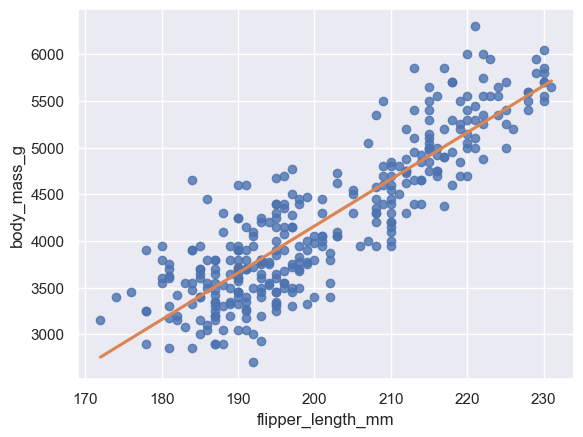

In [4]:
# We're going to recreate this linear regression in scikit-learn
orange = sns.color_palette()[1]
sns.regplot(
    data=df,
    x="flipper_length_mm",
    y="body_mass_g",
    ci=False,
    line_kws={"color": orange},  # to make the line slightly easier to see
);

**1. How can we reproduce & plot a linear regression using the Scikit-learn API?** This can be broken down into the following parts:

   1. fitting a linear regression model;
   2. predicting the values for the linear regression for the range that we're interested in;
   3. producing a scatter plot and plotting the linear regression line on top of it.
   
At the end, you should have a visualization that shows the same data as the Seaborn plot above. (_Can you also make the line color different, as I did above?_)

c:\Users\martin\miniconda3\envs\dsp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Figure size 800x400 with 1 Axes>

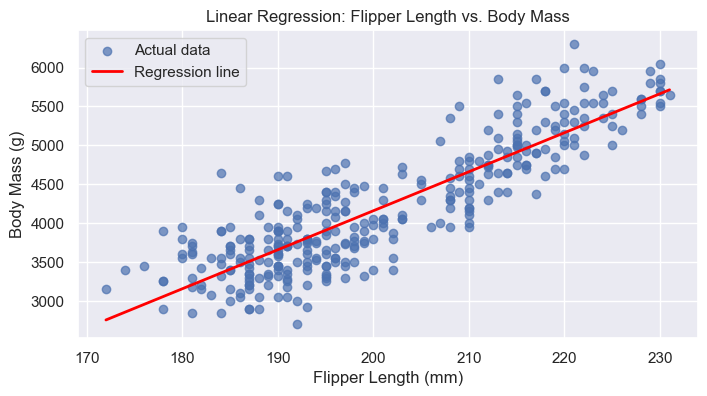

In [5]:
# YOUR CODE HERE
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = df[['flipper_length_mm']]
y = df['body_mass_g']

reg.fit(X, y)
# print(type(df))

x_range = np.linspace(X.min(), X.max(), 100)  # 100 values between min and max
x_range_reshaped = x_range.reshape(-1, 1)
y_pred = reg.predict(x_range_reshaped)

# 6. Plot: Scatter of original data + regression line
plt.figure(figsize=(8, 4))
plt.scatter(X, y, label="Actual data", alpha=0.7)
plt.plot(x_range, y_pred, color="red", label="Regression line", linewidth=2)

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Linear Regression: Flipper Length vs. Body Mass")
plt.legend()
plt.grid(True)
plt.show()

# reg.coef_
# print("Intercept:", reg.intercept_)
# print("Coefficient:", reg.coef_[0])

- - - 
Let's see if we can do the same for **polynomial regression.** Seaborn can give us that, too, by modifying the `order` parameter to set the degree of the polynomial to be fitted. Let's use a cubic polynomial here just for the same of example (the fit isn't great...):

<Figure size 640x480 with 1 Axes>

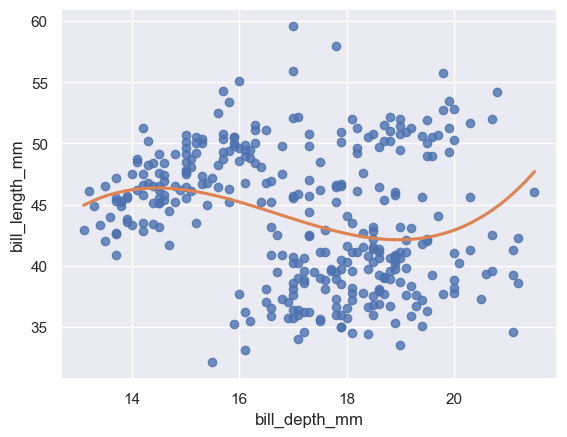

In [6]:
sns.regplot(
    data=df,
    x="bill_depth_mm",
    y="bill_length_mm",
    order=3,  # performs regression with a cubic polynomial
    ci=False,
    line_kws={"color": orange},
);

**2. How can we reproduce & plot a polynomial regression using the Scikit-learn API?**

This requires a _pipeline_ approach, where we first transform the input features before fitting our regular regression model.  Like before, you should obtain a visualization that shows the same data as the Seaborn plot above.

In [7]:
# YOUR CODE HERE

- - - 
## Clustering

Now, let's see if we can cluster penguin species by some of the input features.

### Useful Resources

+ ["In Depth: k-Means Clustering"](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) and ["In Depth: Gaussian Mixture Models"](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html) in the _Python Data Science Handbook_.

In Exercise 2, we produced the following plot, in which it almost looks like the three species form relatively well-separable clusters:

<Figure size 640x480 with 1 Axes>

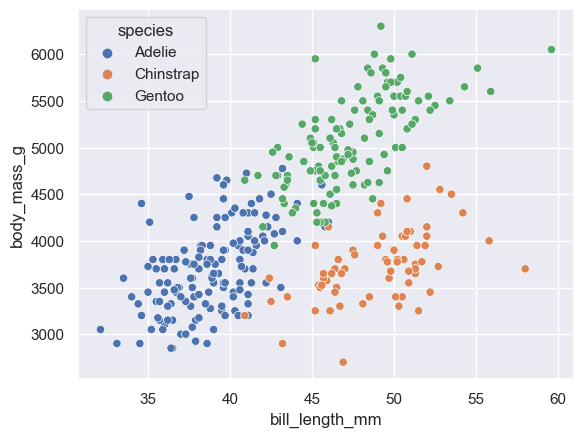

In [8]:
sns.scatterplot(data=df, x="bill_length_mm", y="body_mass_g", hue="species");

**3. Run k-Means clustering (with 3 clusters) on the same two input features (_bill depth_ and _body mass_) and plot the result!** Does it look like you expected?

In [9]:
# YOUR CODE HERE

**4. Run a Gaussian Mixture Model (GMM) in the same way and plot the result!** If you have never used GMMs before and don't know how they work, the respective section of the Python Data Science Handbook provides a lot of information – but for the purpose of this exercise, it is okay if you simply find out _how to apply_ the model.

_Note:_ If you try to follow the book, you might get an `ImportError` because it is a bit outdated here. You can import the model as follows:

```python
from sklearn.mixture import GaussianMixture as GMM
```

In [10]:
# YOUR CODE HERE

**5. Run the GMM model several times. Is the result always the same?** Of course, if a question is phrased like this, the answer is probably "no."  To get more reliable results, you can set the `random_state` when initializating the GMM; but you can also combine several different initializations, e.g. by setting `n_init=10`. Try this out and observe what the predicted clusters look like.

In [11]:
# YOUR CODE HERE

- - - 
## Decision Trees & Model Validation

Let's implement a model for a classification problem: we'll try to **predict the penguin species from its four measurements** (bill length, bill depth, flipper length, body mass). We're ignoring the "sex" variable for now.

Here, we can practice how to prepare our data & evaluate our model, and also try out different ways to analyze a decision tree model.

### Useful Resources

+ ["Hyperparameters and Model Validation"](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) from the _Python Data Science Handbook_
+ ["In Depth: Decision Trees and Random Forests"](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html) from the _Python Data Science Handbook_


**6. Split your data into a _train_ and _test_ set!** Use 80% of the data for training and reserve 20% for testing.

#### Method 1 (Sklearn train_test_split)

In [98]:
# METHOD 1
from sklearn.model_selection import train_test_split

df = fetch_data()
df = df.drop(columns="sex")
# df

data = np.array(df)

species_data = data[:, 2:] # Features
species = data[:, 0] # Labels

# Random state controls the shuffling of the data before splitting and also helps with reproducibility
# X meaning features, y meaning labels
X_train, X_test, y_train, y_test = train_test_split(species_data, species, train_size=0.8, random_state=42)

print(f"{len(X_train)} train",X_train)
print( f"\n{len(X_test)} test",X_test)
print( f"\n{len(y_train)} train_labels",y_train)
print( f"\n{len(y_test)} test_labels",y_test)


266 train [[40.9 13.7 214.0 4650.0]
 [37.3 17.8 191.0 3350.0]
 [50.0 15.9 224.0 5350.0]
 ...
 [39.7 17.7 193.0 3200.0]
 [45.5 15.0 220.0 5000.0]
 [38.1 17.0 181.0 3175.0]]

67 test [[39.5 16.7 178.0 3250.0]
 [46.9 14.6 222.0 4875.0]
 [42.1 19.1 195.0 4000.0]
 [49.8 17.3 198.0 3675.0]
 [41.1 18.2 192.0 4050.0]
 [44.9 13.8 212.0 4750.0]
 [50.7 15.0 223.0 5550.0]
 [49.7 18.6 195.0 3600.0]
 [49.6 18.2 193.0 3775.0]
 [51.4 19.0 201.0 3950.0]
 [42.9 17.6 196.0 4700.0]
 [34.6 21.1 198.0 4400.0]
 [43.3 14.0 208.0 4575.0]
 [36.8 18.5 193.0 3500.0]
 [45.1 14.4 210.0 4400.0]
 [37.0 16.5 185.0 3400.0]
 [36.2 17.2 187.0 3150.0]
 [46.5 17.9 192.0 3500.0]
 [36.7 18.8 187.0 3800.0]
 [45.7 13.9 214.0 4400.0]
 [42.7 18.3 196.0 4075.0]
 [40.7 17.0 190.0 3725.0]
 [49.1 15.0 228.0 5500.0]
 [50.7 19.7 203.0 4050.0]
 [38.9 17.8 181.0 3625.0]
 [38.6 17.0 188.0 2900.0]
 [44.9 13.3 213.0 5100.0]
 [43.5 15.2 213.0 4650.0]
 [58.0 17.8 181.0 3700.0]
 [49.8 15.9 229.0 5950.0]
 [43.2 16.6 187.0 2900.0]
 [52.1 17.0 2

#### Method 2 (Vanilla numpy)

In [63]:
# YOUR CODE HERE

df = fetch_data()
# print(df)
df = df.drop(columns="sex")
# df

data = np.array(df)

np.random.shuffle(data)

# print(data)

def split_data(data):
    species = data[:, 0]
    species_data = data[:, 2:]

    # print(len(species),species)
    # print(len(species_data),species_data)

    split_index = int(len(data) * 0.8)
    print(split_index)
    train = species_data[:split_index, :]
    test = species_data[split_index:, :]
    train_labels = species[:split_index]
    test_labels = species[split_index:]
    

    return train, test, train_labels, test_labels

train, test, train_labels, test_labels = split_data(data)

print(f"{len(train)} train",train)
print( f"\n{len(test)} test",test)
print( f"\n{len(train_labels)} train_labels",train_labels)
print( f"\n{len(test_labels)} test_labels",test_labels)


266
266 train [[41.5 18.3 195.0 4300.0]
 [46.1 18.2 178.0 3250.0]
 [41.8 19.4 198.0 4450.0]
 ...
 [46.5 14.4 217.0 4900.0]
 [40.2 17.0 176.0 3450.0]
 [37.2 18.1 178.0 3900.0]]

67 test [[40.3 18.5 196.0 4350.0]
 [39.2 19.6 195.0 4675.0]
 [39.7 18.9 184.0 3550.0]
 [51.3 14.2 218.0 5300.0]
 [50.2 14.3 218.0 5700.0]
 [38.8 17.2 180.0 3800.0]
 [48.5 14.1 220.0 5300.0]
 [37.7 18.7 180.0 3600.0]
 [35.9 16.6 190.0 3050.0]
 [47.5 14.2 209.0 4600.0]
 [45.2 13.8 215.0 4750.0]
 [49.5 16.1 224.0 5650.0]
 [38.8 17.6 191.0 3275.0]
 [39.6 18.1 186.0 4450.0]
 [53.4 15.8 219.0 5500.0]
 [42.5 20.7 197.0 4500.0]
 [46.2 17.5 187.0 3650.0]
 [41.7 14.7 210.0 4700.0]
 [38.2 20.0 190.0 3900.0]
 [47.5 14.0 212.0 4875.0]
 [42.3 21.2 191.0 4150.0]
 [47.6 18.3 195.0 3850.0]
 [50.0 15.2 218.0 5700.0]
 [46.6 17.8 193.0 3800.0]
 [50.8 17.3 228.0 5600.0]
 [43.4 14.4 218.0 4600.0]
 [36.7 18.8 187.0 3800.0]
 [40.9 18.9 184.0 3900.0]
 [50.8 18.5 201.0 4450.0]
 [36.0 17.9 190.0 3450.0]
 [36.6 17.8 185.0 3700.0]
 [41.1 17

**7. Train a decision tree classifier and produce predictions on the test set.** It's a good idea to set the `random_state` when you instantiate your classifier, so that your results are the same if you re-run the cells (or the entire notebook).

In [68]:
# YOUR CODE HERE

from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision Tree Classifier with a set random_state to allow for reproducibility
tree_clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree
tree_clf.fit(X_train, y_train)

# Predict test set
prediction = tree_clf.predict(X_test)


**8. Evaluate how well your classifier performs.** Look at:

- accuracy;
- F1-scores for the three target classes (take a look at [the sklearn docs](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) if you're not sure what function to use);
- the absolute number of _wrong_ predictions your classifier made.

If your classifier turns out to be perfect (which can happen here!), change the random state until it's not to make the following task a bit more interesting... ;)

In [96]:
# YOUR CODE HERE
from sklearn.metrics import f1_score, accuracy_score

# f1_score()
# print(type(y_test))
newdf = pd.DataFrame(y_test)
predictionResult = (newdf == pd.DataFrame(prediction)).sum().sum()

print(predictionResult / len(y_test), f"({predictionResult}/{len(y_test)}) correctly classified!")
acc = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction, average='macro')

print(acc, f1)


# print(prediction)


1.0 (67/67) correctly classified!
1.0 1.0


**9. Plot a _confusion matrix_** that shows how often a class was mistakenly for another. (_Hint:_ This is shown at the end of the ["Random Forests" chapter](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html).)

Text(110.44999999999997, 0.5, 'predicted label')

<Figure size 640x480 with 1 Axes>

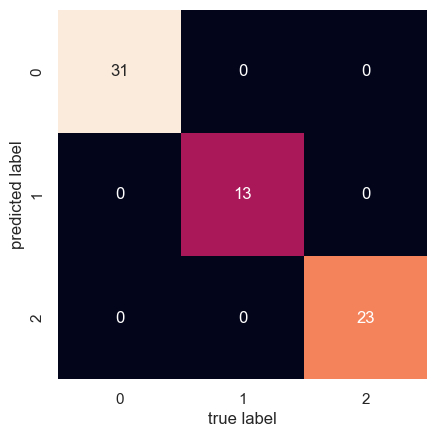

In [103]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

**10. What is the first criterion your decision tree splits on? Is there a feature that is (almost) never used?**

Decision trees are easily interpretable, which is one of their main advantages.  Look at Scikit-learn's [`plot_tree` function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) and see if you can interpret what your classifier has learned.

In [107]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

[
    Text(0.640625, 0.9375, 'X[2] <= 206.5\ngini = 0.64\nsamples = 266\nvalue = [115, 55, 96]'),
    Text(0.46875, 0.8125, 'X[0] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113, 50, 1]'),
    Text(0.3125, 0.6875, 'X[0] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
    Text(0.1875, 0.5625, 'X[1] <= 16.7\ngini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
    Text(0.125, 0.4375, 'X[0] <= 39.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1, 0]'),
    Text(0.0625, 0.3125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
    Text(0.1875, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
    Text(0.25, 0.4375, 'gini = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
    Text(0.4375, 0.5625, 'X[2] <= 189.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
    Text(0.375, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
    Text(0.5, 0.4375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
    Text(0.625, 0.6875, 'X[3] <= 4100.0\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
    Text(0.5625, 0.5625, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
    Text(0.6875, 0.5625, 'X[0] <= 48.8\ngini = 0.542\nsamples = 12\nvalue = [4, 7, 1]'),
    Text(0.625, 0.4375, 'X[1] <= 16.65\ngini = 0.5\nsamples = 6\nvalue = [4, 1, 1]'),
    Text(0.5625, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
    Text(0.6875, 0.3125, 'X[0] <= 45.9\ngini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
    Text(0.625, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
    Text(0.75, 0.1875, 'X[1] <= 20.2\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
    Text(0.6875, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
    Text(0.8125, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
    Text(0.75, 0.4375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
    Text(0.8125, 0.8125, 'X[1] <= 17.65\ngini = 0.13\nsamples = 102\nvalue = [2, 5, 95]'),
    Text(0.75, 0.6875, 'gini = 0.0\nsamples = 95\nvalue = [0, 0, 95]'),
    Text(0.875, 0.6875, 'X[1] <= 18.95\ngini = 0.408\nsamples = 7\nvalue = [2, 5, 0]'),
    Text(0.8125, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
    Text(0.9375, 0.5625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]')
]

<Figure size 640x480 with 1 Axes>

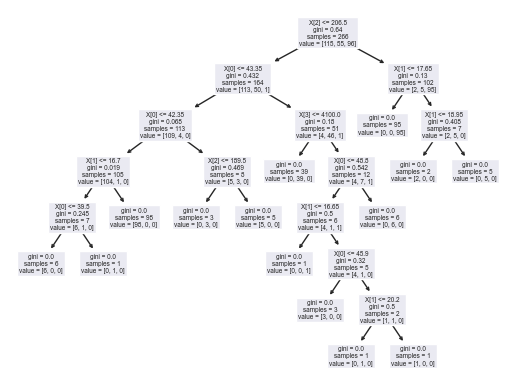

In [110]:
# YOUR CODE HERE
from sklearn import tree

tree.plot_tree(tree_clf)
# visualize_classifier(tree_clf, X_test, y_test)

- - - 
## SVMs, Hyperparameters, and Cross-Validation

Let's try one more classification task: **Can we predict the _sex_ of a penguin just from knowing its _body mass_ and _species_?**  We'll swap out our classifier for a support vector machine (SVM) this time, and practice a bit with automatic hyperparameter search and cross-validation.

### Useful Resources

+ ["Hyperparameters and Model Validation"](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) from the _Python Data Science Handbook_
+ ["In Depth: Support Vector Machines"](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html) from the _Python Data Science Handbook_

_Note:_ If you try to follow the book, you might again get an `ImportError` on some occasions. Functions related to model validation can now be found in `sklearn.model_selection`, for example:

```python
from sklearn.model_selection import GridSearchCV, cross_val_score
```

**11. Split your data into _train_ and _test_ set again** (this time using "species" and "body mass" as input features and "sex" as the target), but also **_convert the "species" column_ to a one-hot representation!**

Since we want to use a discrete, text-valued column ("species") as one of our input features, we first need to make it numerical somehow, since the SVM will only accept numerical input. _One-hot encoding_ is the easiest choice for that.

_Tip:_ You can get this either through [Pandas' `get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html#pandas.get_dummies) or [Scikit-learn's `OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).

In [17]:
# YOUR CODE HERE

**12. Fit a support vector classifier to the data and evaluate its accuracy!** Use a "linear" kernel and leave the regularization parameter `C=1.0` at its default value.

In [18]:
# YOUR CODE HERE

**13. Using the same classifier as above, perform _10-fold cross-validation_ to evaluate its accuracy!**  How different is the value from the single evaluation you did before?

In [19]:
# YOUR CODE HERE

**14. Perform grid search to find the best kernel and regularization value for our task!** Support vector machines are very sensitive to these two hyperparameters in particular. How many parameters you evaluate is up to you (it can take a look time to perform grid search with many parameters!), but you should look at least the "linear" and "rbf" kernels as well as C=1, C=10, C=100.

After this grid search, evaluate your best model configuration again like you did above. Does it perform better?

(You might want to look at both the [section on "Grid Search" in the book](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#Validation-in-Practice:-Grid-Search) as well as the [Scikit-learn docs](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search) here.)

In [20]:
# YOUR CODE HERE